In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/user/Desktop/CapstoneProject/Agri Data Explorer/ICRISAT-District Level Data - ICRISAT-District Level Data.csv")


In [18]:
display(df.head())

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [8]:
print("Missing Values in Each Column")
print(df.isnull().sum())

Missing Values in Each Column
Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64


In [12]:
def convert_units(df, crop_name):
    """Convert crop area & production to smaller units (ha and tons)."""
    area_col = f"{crop_name}_AREA_(1000_HA)"
    prod_col = f"{crop_name}_PRODUCTION_(1000_TONS)"

    if area_col in df.columns:
        df[f"{crop_name}_AREA_(HA)"] = df[area_col] * 1000
    if prod_col in df.columns:
        df[f"{crop_name}_PRODUCTION_(TONS)"] = df[prod_col] * 1000




In [14]:
crops = ["RICE", "WHEAT", "MAIZE", "COTTON", "SUGARCANE", "SOYABEAN", "OILSEEDS"]
for crop in crops:
    convert_units(df, crop)

print(" Unit conversion completed for key crops (area & production).")

 Unit conversion completed for key crops (area & production).


In [16]:
df_shape = df.shape[0]
df.drop_duplicates(inplace=True)

In [17]:
display(df.head())

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [19]:
df.to_csv("cleaned_agriculture_data.csv", index=False)
print("Cleaned dataset saved as: cleaned_agriculture_data.csv")

Cleaned dataset saved as: cleaned_agriculture_data.csv


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
df1=pd.read_csv("C:/Users/user/Desktop/CapstoneProject/Agri Data Explorer/cleaned_agriculture_data.csv")
df1.columns = df1.columns.str.strip()

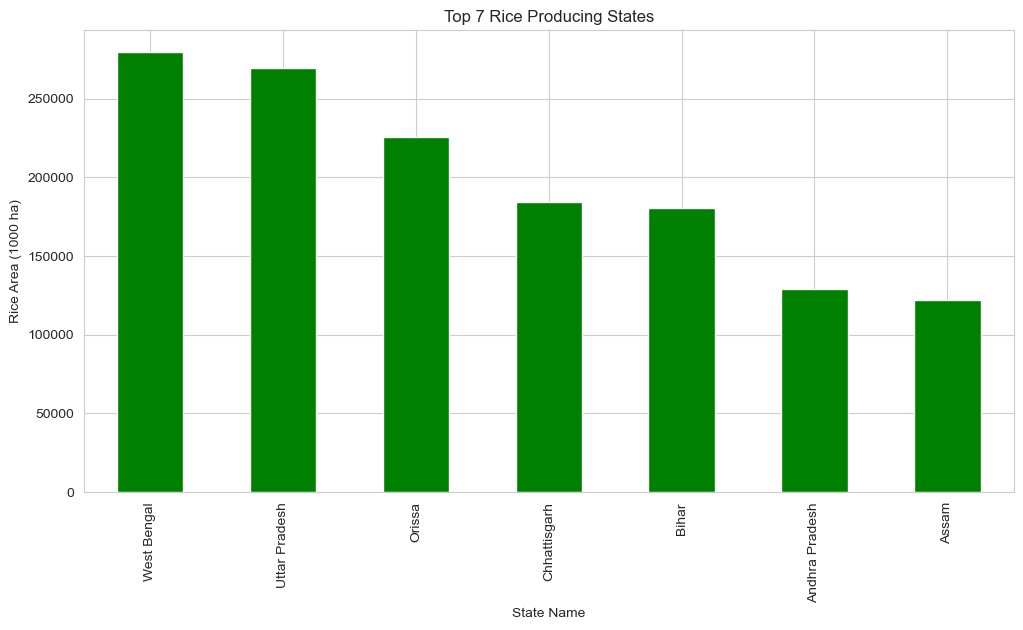

In [31]:
 #Top 7 Rice Producing States
rice_top7 = df1.groupby('State Name')['RICE AREA (1000 ha)'].sum().sort_values(ascending=False).head(7)
rice_top7.plot(kind='bar', color='green')
plt.title("Top 7 Rice Producing States")
plt.ylabel("Rice Area (1000 ha)")
plt.show()




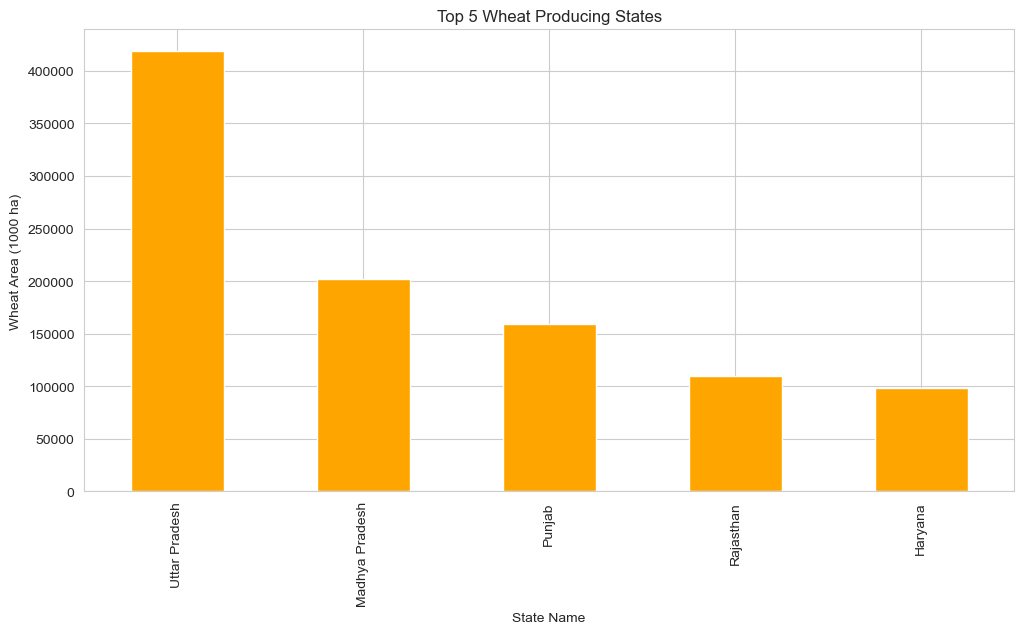

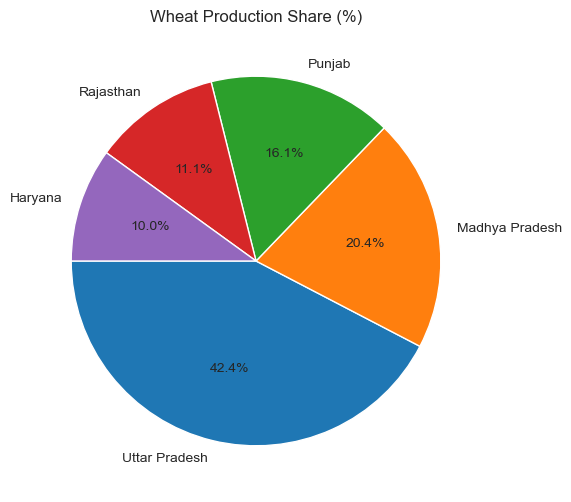

In [33]:
wheat_top5 = df1.groupby('State Name')['WHEAT AREA (1000 ha)'].sum().sort_values(ascending=False).head(5)
# Bar
wheat_top5.plot(kind='bar', color='orange')
plt.title("Top 5 Wheat Producing States")
plt.ylabel("Wheat Area (1000 ha)")
plt.show()
# Pie
wheat_top5.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title("Wheat Production Share (%)")
plt.ylabel("")
plt.show()

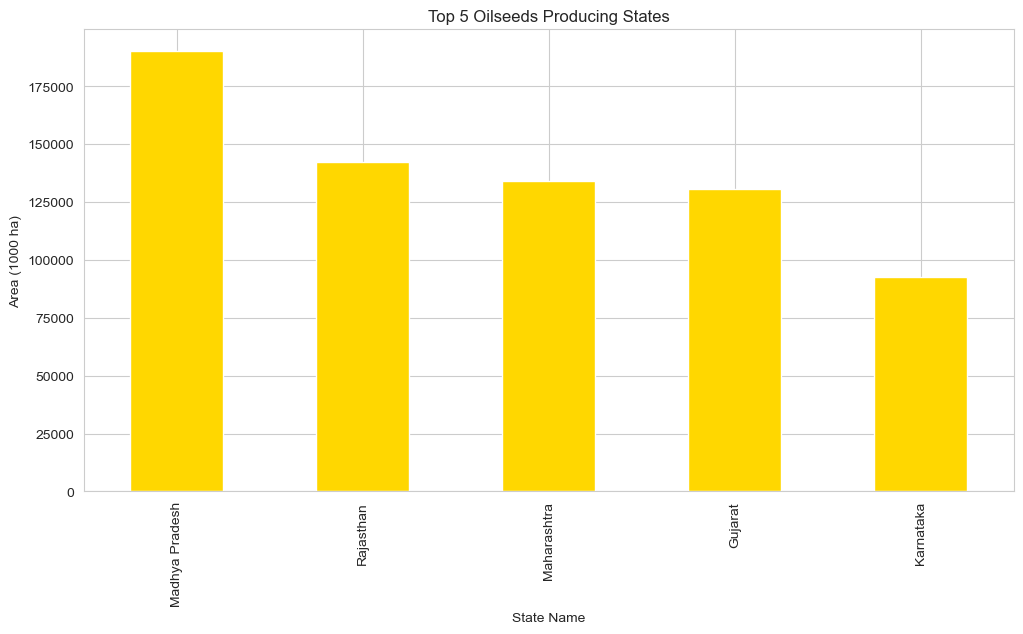

In [34]:
oilseed_top5 = df1.groupby('State Name')['OILSEEDS AREA (1000 ha)'].sum().sort_values(ascending=False).head(5)
oilseed_top5.plot(kind='bar', color='gold')
plt.title("Top 5 Oilseeds Producing States")
plt.ylabel("Area (1000 ha)")
plt.show()

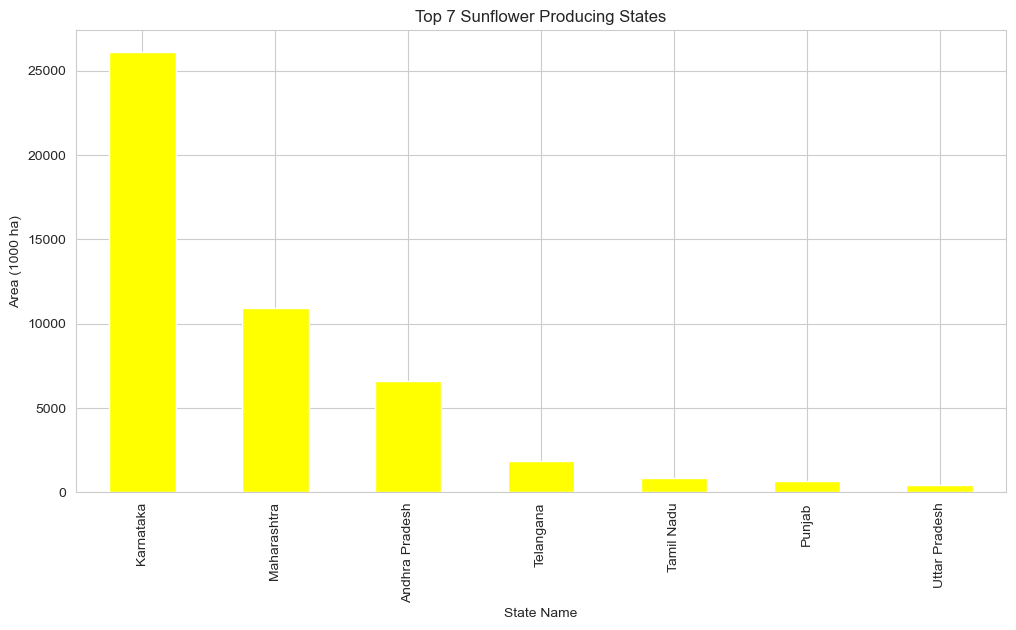

In [35]:
sunflower_top7 = df1.groupby('State Name')['SUNFLOWER AREA (1000 ha)'].sum().sort_values(ascending=False).head(7)
sunflower_top7.plot(kind='bar', color='yellow')
plt.title("Top 7 Sunflower Producing States")
plt.ylabel("Area (1000 ha)")
plt.show()


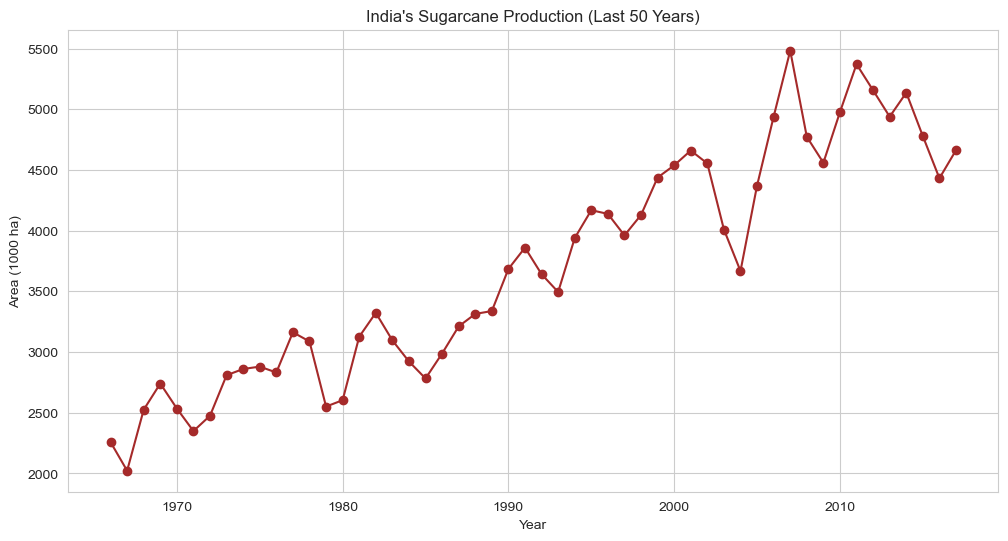

In [36]:
sugarcane_trend = df1.groupby('Year')['SUGARCANE AREA (1000 ha)'].sum()
sugarcane_trend.plot(kind='line', marker='o', color='brown')
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.ylabel("Area (1000 ha)")
plt.xlabel("Year")
plt.show()


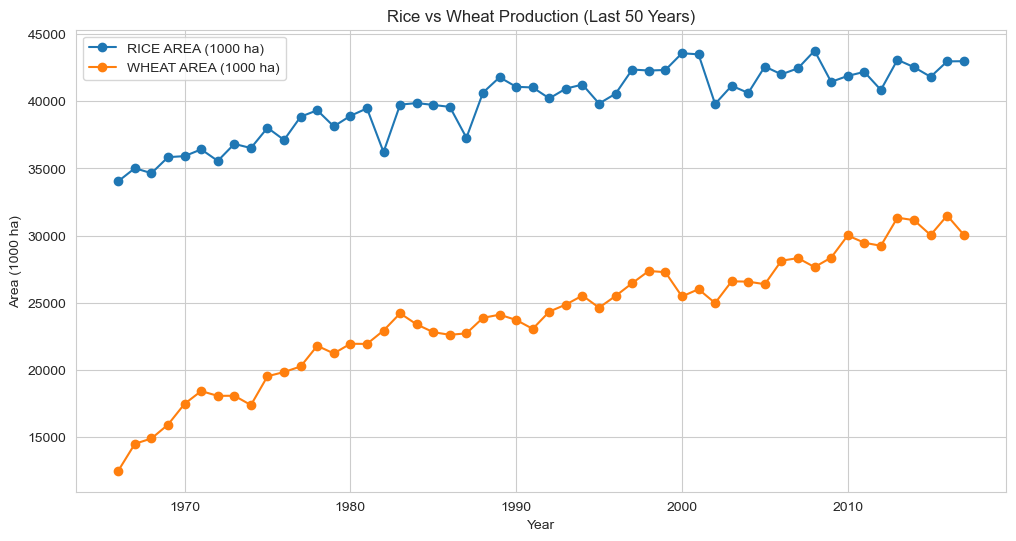

In [37]:
crop_trend = df1.groupby('Year')[['RICE AREA (1000 ha)', 'WHEAT AREA (1000 ha)']].sum()
crop_trend.plot(marker='o')
plt.title("Rice vs Wheat Production (Last 50 Years)")
plt.ylabel("Area (1000 ha)")
plt.show()


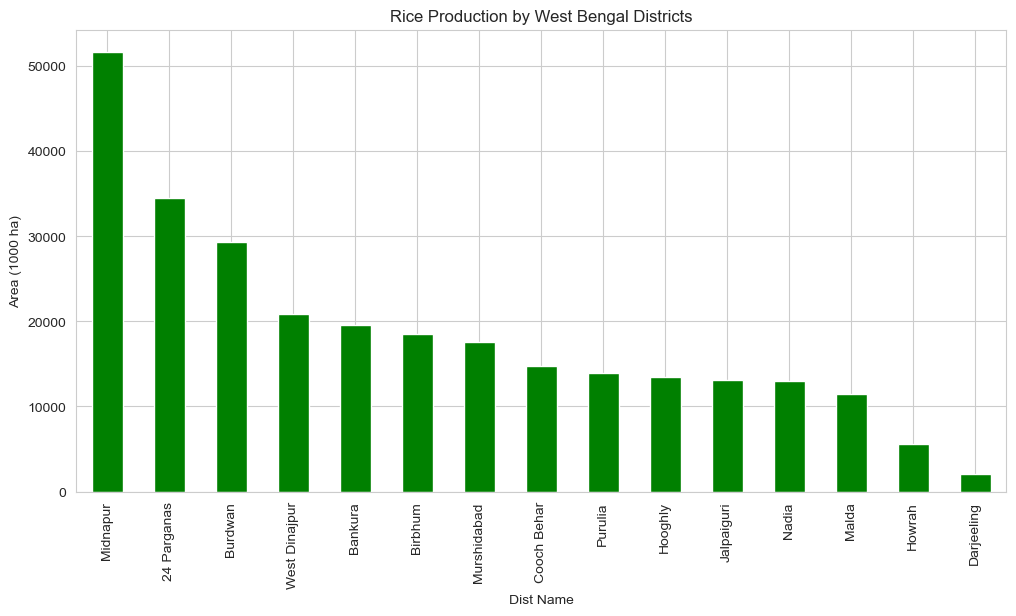

In [38]:
wb_rice = df1[df1['State Name']=='West Bengal'].groupby('Dist Name')['RICE AREA (1000 ha)'].sum().sort_values(ascending=False)
wb_rice.plot(kind='bar', color='green')
plt.title("Rice Production by West Bengal Districts")
plt.ylabel("Area (1000 ha)")
plt.show()

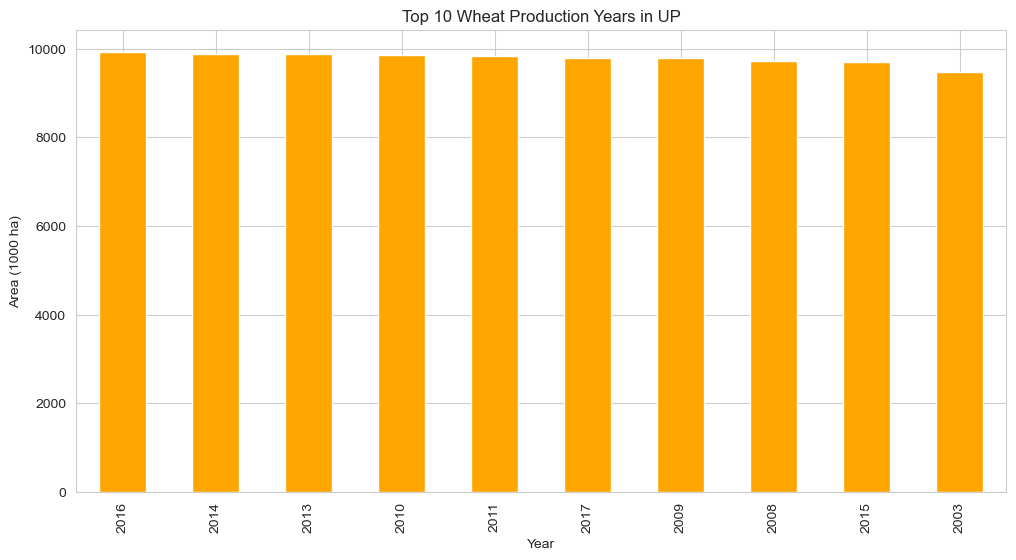

In [39]:
up_wheat = df1[df1['State Name']=='Uttar Pradesh'].groupby('Year')['WHEAT AREA (1000 ha)'].sum().sort_values(ascending=False).head(10)
up_wheat.plot(kind='bar', color='orange')
plt.title("Top 10 Wheat Production Years in UP")
plt.ylabel("Area (1000 ha)")
plt.show()

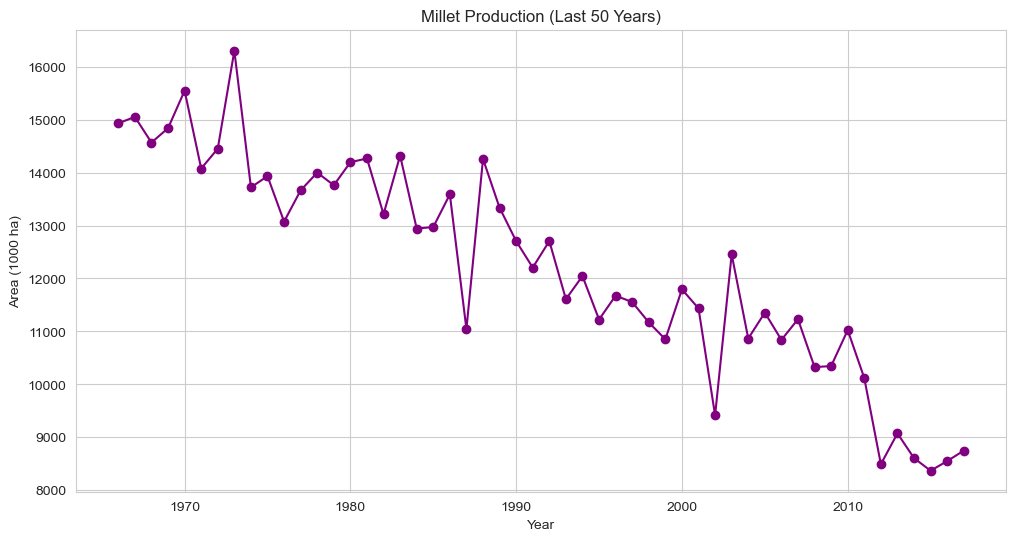

In [40]:
millet_trend = df1.groupby('Year')[['PEARL MILLET AREA (1000 ha)','FINGER MILLET AREA (1000 ha)']].sum().sum(axis=1)
millet_trend.plot(kind='line', marker='o', color='purple')
plt.title("Millet Production (Last 50 Years)")
plt.ylabel("Area (1000 ha)")
plt.show()

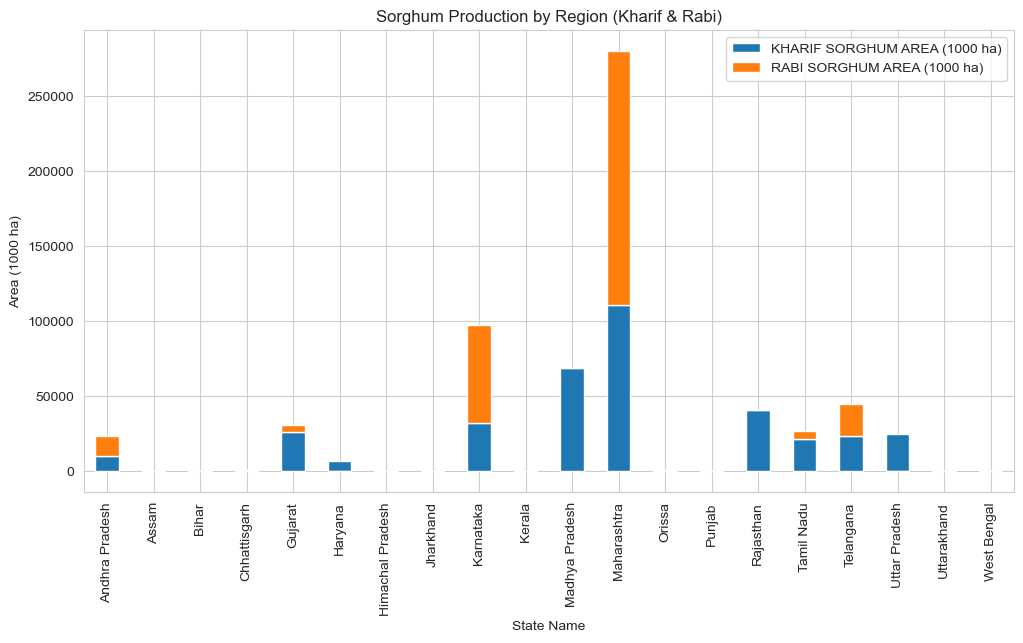

In [41]:
sorghum_region = df1.groupby('State Name')[['KHARIF SORGHUM AREA (1000 ha)','RABI SORGHUM AREA (1000 ha)']].sum()
sorghum_region.plot(kind='bar', stacked=True)
plt.title("Sorghum Production by Region (Kharif & Rabi)")
plt.ylabel("Area (1000 ha)")
plt.show()

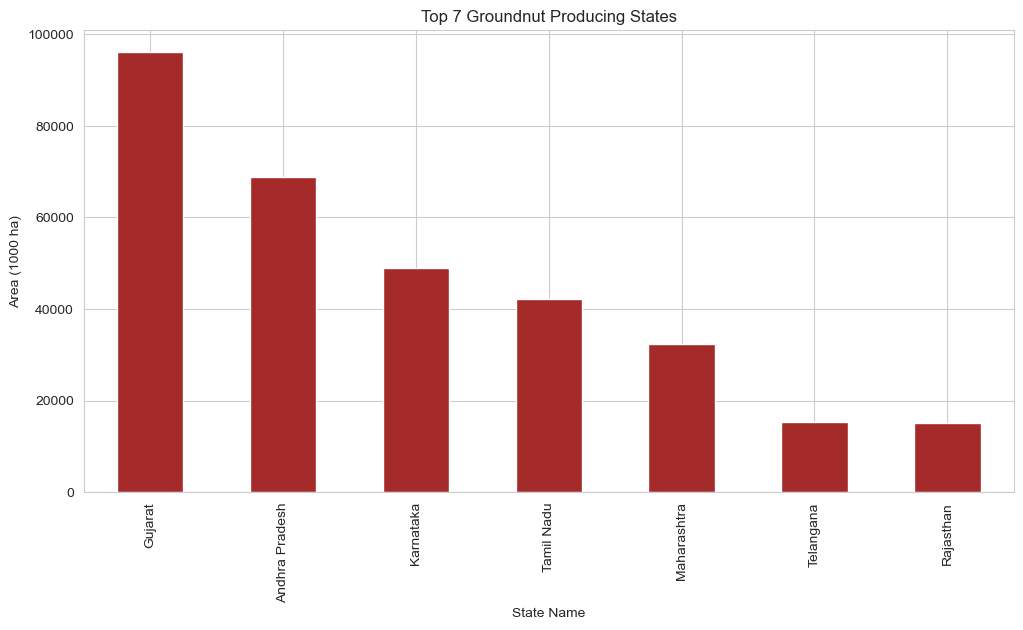

In [42]:
groundnut_top7 = df1.groupby('State Name')['GROUNDNUT AREA (1000 ha)'].sum().sort_values(ascending=False).head(7)
groundnut_top7.plot(kind='bar', color='brown')
plt.title("Top 7 Groundnut Producing States")
plt.ylabel("Area (1000 ha)")
plt.show()


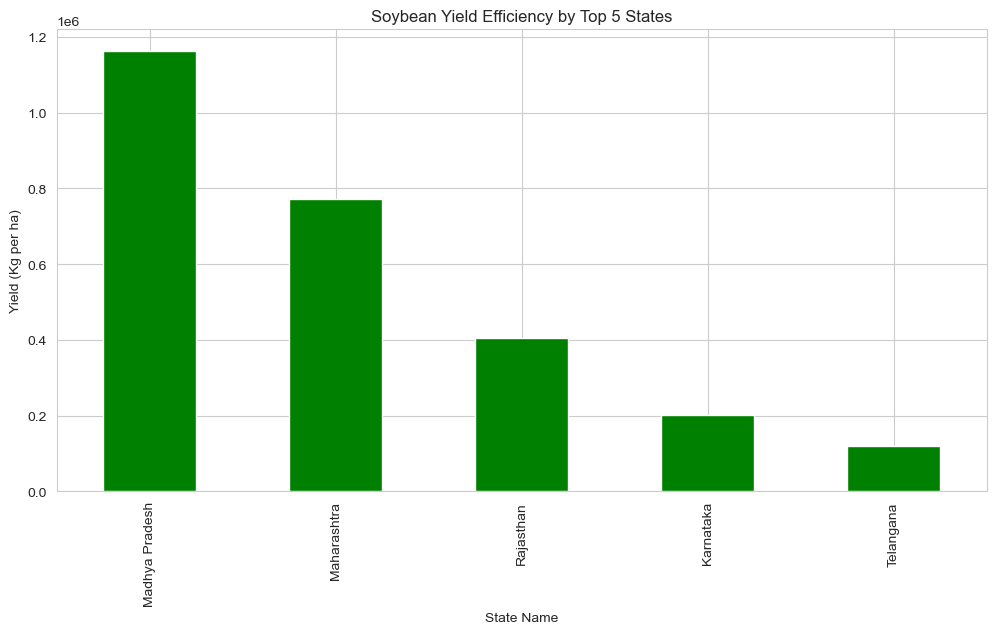

In [43]:
soybean_top5 = df1.groupby('State Name')[['SOYABEAN AREA (1000 ha)','SOYABEAN YIELD (Kg per ha)']].sum().sort_values(by='SOYABEAN AREA (1000 ha)', ascending=False).head(5)
soybean_top5['SOYABEAN YIELD (Kg per ha)'].plot(kind='bar', color='green')
plt.title("Soybean Yield Efficiency by Top 5 States")
plt.ylabel("Yield (Kg per ha)")
plt.show()

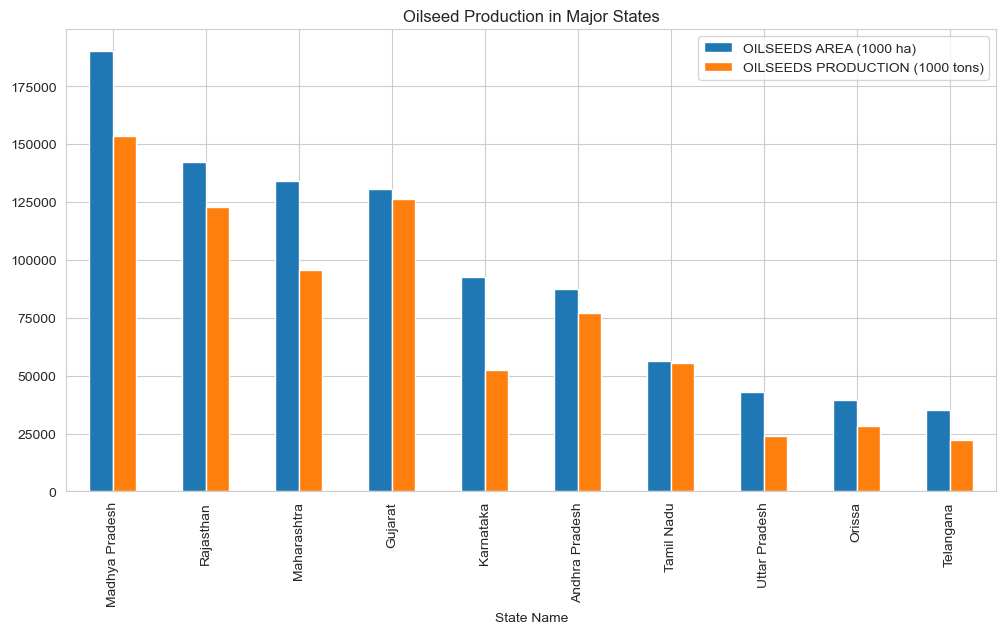

In [44]:
oilseed_major = df1.groupby('State Name')[['OILSEEDS AREA (1000 ha)','OILSEEDS PRODUCTION (1000 tons)']].sum().sort_values(by='OILSEEDS AREA (1000 ha)', ascending=False)
oilseed_major.head(10).plot(kind='bar')
plt.title("Oilseed Production in Major States")
plt.show()

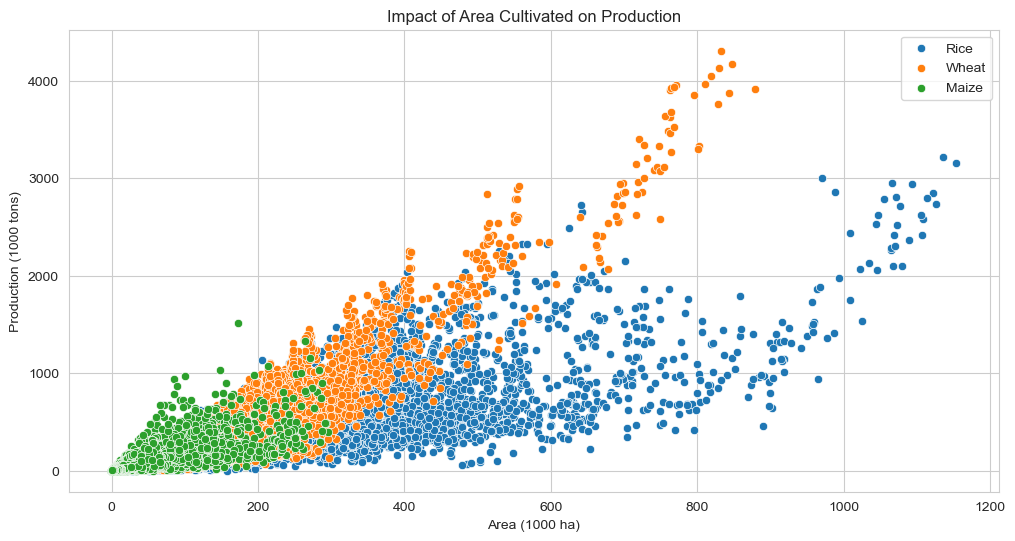

In [45]:
sns.scatterplot(data=df1, x='RICE AREA (1000 ha)', y='RICE PRODUCTION (1000 tons)', label='Rice')
sns.scatterplot(data=df1, x='WHEAT AREA (1000 ha)', y='WHEAT PRODUCTION (1000 tons)', label='Wheat')
sns.scatterplot(data=df1, x='MAIZE AREA (1000 ha)', y='MAIZE PRODUCTION (1000 tons)', label='Maize')
plt.title("Impact of Area Cultivated on Production")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Area (1000 ha)")
plt.legend()
plt.show()

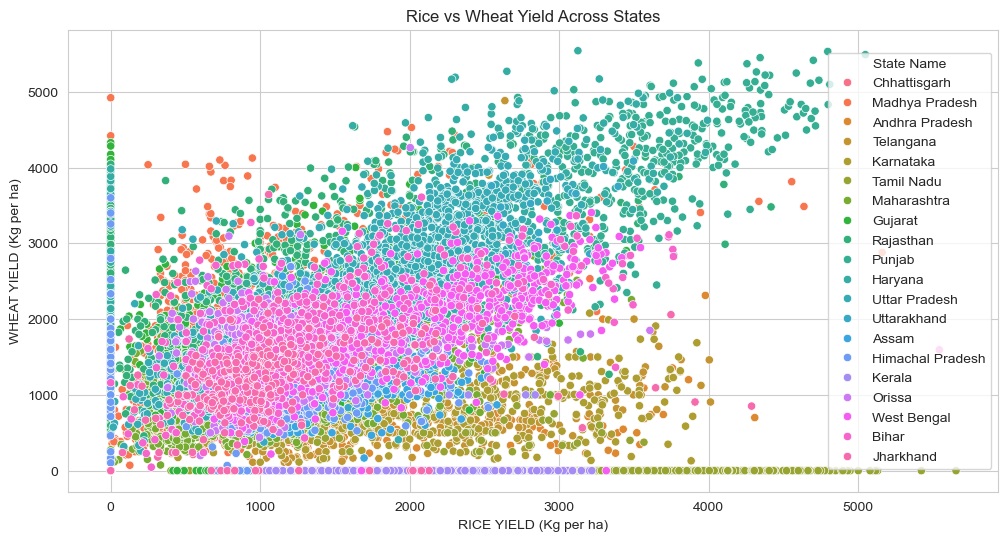

In [46]:
sns.scatterplot(data=df1, x='RICE YIELD (Kg per ha)', y='WHEAT YIELD (Kg per ha)', hue='State Name')
plt.title("Rice vs Wheat Yield Across States")
plt.show()

In [47]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [55]:
import mysql.connector
df1=pd.read_csv("C:/Users/user/Desktop/CapstoneProject/Agri Data Explorer/cleaned_agriculture_data.csv")
df1.columns = df1.columns.str.strip()

In [59]:
df1.rename(columns={
    'Dist Code':'DistCode',
    'Year':'Year',
    'State Code':'StateCode',
    'State Name':'StateName',
    'Dist Name':'DistName',
    'RICE AREA (1000 ha)':'RICE_AREA',
    'RICE PRODUCTION (1000 tons)':'RICE_PRODUCTION',
    'RICE YIELD (Kg per ha)':'RICE_YIELD',
    'WHEAT AREA (1000 ha)':'WHEAT_AREA',
    'WHEAT PRODUCTION (1000 tons)':'WHEAT_PRODUCTION',
    'WHEAT YIELD (Kg per ha)':'WHEAT_YIELD',
    'KHARIF SORGHUM AREA (1000 ha)':'KHARIF_SORGHUM_AREA',
    'KHARIF SORGHUM PRODUCTION (1000 tons)':'KHARIF_SORGHUM_PRODUCTION',
    'KHARIF SORGHUM YIELD (Kg per ha)':'KHARIF_SORGHUM_YIELD',
    'RABI SORGHUM AREA (1000 ha)':'RABI_SORGHUM_AREA',
    'RABI SORGHUM PRODUCTION (1000 tons)':'RABI_SORGHUM_PRODUCTION',
    'RABI SORGHUM YIELD (Kg per ha)':'RABI_SORGHUM_YIELD',
    'SORGHUM AREA (1000 ha)':'SORGHUM_AREA',
    'SORGHUM PRODUCTION (1000 tons)':'SORGHUM_PRODUCTION',
    'SORGHUM YIELD (Kg per ha)':'SORGHUM_YIELD',
    'PEARL MILLET AREA (1000 ha)':'PEARL_MILLET_AREA',
    'PEARL MILLET PRODUCTION (1000 tons)':'PEARL_MILLET_PRODUCTION',
    'PEARL MILLET YIELD (Kg per ha)':'PEARL_MILLET_YIELD',
    'MAIZE AREA (1000 ha)':'MAIZE_AREA',
    'MAIZE PRODUCTION (1000 tons)':'MAIZE_PRODUCTION',
    'MAIZE YIELD (Kg per ha)':'MAIZE_YIELD',
    'FINGER MILLET AREA (1000 ha)':'FINGER_MILLET_AREA',
    'FINGER MILLET PRODUCTION (1000 tons)':'FINGER_MILLET_PRODUCTION',
    'FINGER MILLET YIELD (Kg per ha)':'FINGER_MILLET_YIELD',
    'BARLEY AREA (1000 ha)':'BARLEY_AREA',
    'BARLEY PRODUCTION (1000 tons)':'BARLEY_PRODUCTION',
    'BARLEY YIELD (Kg per ha)':'BARLEY_YIELD',
    'CHICKPEA AREA (1000 ha)':'CHICKPEA_AREA',
    'CHICKPEA PRODUCTION (1000 tons)':'CHICKPEA_PRODUCTION',
    'CHICKPEA YIELD (Kg per ha)':'CHICKPEA_YIELD',
    'PIGEONPEA AREA (1000 ha)':'PIGEONPEA_AREA',
    'PIGEONPEA PRODUCTION (1000 tons)':'PIGEONPEA_PRODUCTION',
    'PIGEONPEA YIELD (Kg per ha)':'PIGEONPEA_YIELD',
    'MINOR PULSES AREA (1000 ha)':'MINOR_PULSES_AREA',
    'MINOR PULSES PRODUCTION (1000 tons)':'MINOR_PULSES_PRODUCTION',
    'MINOR PULSES YIELD (Kg per ha)':'MINOR_PULSES_YIELD',
    'GROUNDNUT AREA (1000 ha)':'GROUNDNUT_AREA',
    'GROUNDNUT PRODUCTION (1000 tons)':'GROUNDNUT_PRODUCTION',
    'GROUNDNUT YIELD (Kg per ha)':'GROUNDNUT_YIELD',
    'SESAMUM AREA (1000 ha)':'SESAMUM_AREA',
    'SESAMUM PRODUCTION (1000 tons)':'SESAMUM_PRODUCTION',
    'SESAMUM YIELD (Kg per ha)':'SESAMUM_YIELD',
    'RAPESEED AND MUSTARD AREA (1000 ha)':'RAPESEED_MUSTARD_AREA',
    'RAPESEED AND MUSTARD PRODUCTION (1000 tons)':'RAPESEED_MUSTARD_PRODUCTION',
    'RAPESEED AND MUSTARD YIELD (Kg per ha)':'RAPESEED_MUSTARD_YIELD',
    'SAFFLOWER AREA (1000 ha)':'SAFFLOWER_AREA',
    'SAFFLOWER PRODUCTION (1000 tons)':'SAFFLOWER_PRODUCTION',
    'SAFFLOWER YIELD (Kg per ha)':'SAFFLOWER_YIELD',
    'CASTOR AREA (1000 ha)':'CASTOR_AREA',
    'CASTOR PRODUCTION (1000 tons)':'CASTOR_PRODUCTION',
    'CASTOR YIELD (Kg per ha)':'CASTOR_YIELD',
    'LINSEED AREA (1000 ha)':'LINSEED_AREA',
    'LINSEED PRODUCTION (1000 tons)':'LINSEED_PRODUCTION',
    'LINSEED YIELD (Kg per ha)':'LINSEED_YIELD',
    'SUNFLOWER AREA (1000 ha)':'SUNFLOWER_AREA',
    'SUNFLOWER PRODUCTION (1000 tons)':'SUNFLOWER_PRODUCTION',
    'SUNFLOWER YIELD (Kg per ha)':'SUNFLOWER_YIELD',
    'SOYABEAN AREA (1000 ha)':'SOYABEAN_AREA',
    'SOYABEAN PRODUCTION (1000 tons)':'SOYABEAN_PRODUCTION',
    'SOYABEAN YIELD (Kg per ha)':'SOYABEAN_YIELD',
    'OILSEEDS AREA (1000 ha)':'OILSEEDS_AREA',
    'OILSEEDS PRODUCTION (1000 tons)':'OILSEEDS_PRODUCTION',
    'OILSEEDS YIELD (Kg per ha)':'OILSEEDS_YIELD',
    'SUGARCANE AREA (1000 ha)':'SUGARCANE_AREA',
    'SUGARCANE PRODUCTION (1000 tons)':'SUGARCANE_PRODUCTION',
    'SUGARCANE YIELD (Kg per ha)':'SUGARCANE_YIELD',
    'COTTON AREA (1000 ha)':'COTTON_AREA',
    'COTTON PRODUCTION (1000 tons)':'COTTON_PRODUCTION',
    'COTTON YIELD (Kg per ha)':'COTTON_YIELD',
    'FRUITS AREA (1000 ha)':'FRUITS_AREA',
    'VEGETABLES AREA (1000 ha)':'VEGETABLES_AREA',
    'FRUITS AND VEGETABLES AREA (1000 ha)':'FRUITS_VEGETABLES_AREA',
    'POTATOES AREA (1000 ha)':'POTATOES_AREA',
    'ONION AREA (1000 ha)':'ONION_AREA',
    'FODDER AREA (1000 ha)':'FODDER_AREA'
}, inplace=True)

In [60]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sql@pass3",
    database="AgricultureDB"  # Your existing database
)
cursor = conn.cursor()

In [61]:
cols = df1.columns.tolist()

In [62]:
placeholders = ', '.join(['%s'] * len(cols))
columns = ', '.join([f"`{c}`" for c in cols])  # backticks handle special names if needed

sql = f"INSERT INTO CropData ({columns}) VALUES ({placeholders})"

data = [tuple(x) for x in df1.to_numpy()]

# Insert all rows at once
cursor.executemany(sql, data)
conn.commit()
print("Data successfully loaded into existing MySQL table")


Data successfully loaded into existing MySQL table
